In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.font_manager import fontManager
import seaborn as sns

In [2]:
fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
matplotlib.rc('font', family='Taipei Sans TC Beta')
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']
plt.rcParams['axes.unicode_minus'] = False
sns.set(font=['sans-serif'])
sns.set_style("whitegrid", {"font.sans-serif": ['Taipei Sans TC Beta']})

In [9]:
df = pd.read_csv('./datasource/BaHaMut_9.csv')
# df['平均觀看數(萬)'] = df['觀看數(萬)']
# df = df.drop('平均觀看數', axis=1)
# df = df.drop('觀看數(萬)', axis=1)
# df['總觀看數'] = round(df['總觀看數'] / 10000, ndigits=1)
# df['總觀看數(萬)'] = df['總觀看數']
# df = df.drop('人氣度', axis=1)
df

,動畫名,年份,月份,集數,星級,評分人數,導演監督,製作廠商,作品分類1,作品分類2,作品分類3,作品分類4,作品分類5,作品分類6,原作載體,新續作,平均觀看數(萬),總觀看數(萬)
0,叫我對大哥 (TV版),2021,夏番,12,4.8,600,青木純,Fanworks、SPACE NEKO COMPANY,喜劇,悠閒,泡麵番,闔家觀賞,NaN,NaN,漫畫改編,新作,1.8,21.7
1,汪汪與喵喵,2020,秋番,24,4.8,200,岸誠二,Team Till Dawn,喜劇,溫馨,泡麵番,闔家觀賞,NaN,NaN,漫畫改編,新作,0.3,6.6
2,鬼滅之刃 刀匠村篇,2023,春番,11,4.8,18600,外崎春雄,ufotable,動作,冒險,奇幻,血腥暴力,NaN,NaN,漫畫改編,續作,49.9,548.8
3,IDOLiSH7 - 偶像星願 - Third BEAT！,2021,夏番,30,4.8,1300,別所誠人,TROYCA,偶像,音樂,NaN,NaN,NaN,NaN,遊戲改編,續作,1.9,56.0
4,薄櫻鬼 新OVA,2021,秋番,3,4.8,300,ヤマサキオサム,Studio DEEN,奇幻,戀愛,歷史,NaN,NaN,NaN,遊戲改編,續作,1.6,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,土下座跪求給看 年齡限制版,2020,秋番,13,4.5,1700,永居慎平,アドネロ,動作,喜劇,勵志,18禁,NaN,NaN,漫畫改編,新作,8.0,103.4
434,女神宿舍的管理員。 年齡限制版,2021,夏番,10,4.7,2300,中重俊祐,Asread,校園,喜劇,戀愛,18禁,NaN,NaN,漫畫改編,新作,11.3,112.7
435,彼得・格里爾的賢者時間 年齡限制版,2020,夏番,12,4.2,1600,辰美,Wolfsbane,奇幻,喜劇,18禁,NaN,NaN,NaN,漫畫改編,新作,11.2,133.9
436,壽司大相撲,2021,春番,52,4.1,400,助川勇太,白組,喜劇,悠閒,闔家觀賞,泡麵番,NaN,NaN,漫畫改編,新作,0.4,23.3


In [13]:
p = df['總觀看數(萬)'].to_list()
q = []
for number in p:
    if number >= 40:
        q.append(4)
    elif 40 >= number > 20:
        q.append(3)
    elif 20 >= number > 10:
        q.append(2)
    elif 10 >= number > 1:
        q.append(1)
    elif number <= 1:
        q.append(0)
df['人氣度'] = q

In [7]:
df.to_csv('./datasource/BaHaMut_9.csv', index=False)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438 entries, 0 to 437
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   動畫名     438 non-null    object 
 1   總觀看數    438 non-null    int64  
 2   平均觀看數   438 non-null    int64  
 3   年份      438 non-null    int64  
 4   月份      438 non-null    object 
 5   集數      438 non-null    int64  
 6   星級      438 non-null    float64
 7   評分人數    438 non-null    int64  
 8   導演監督    436 non-null    object 
 9   製作廠商    438 non-null    object 
 10  作品分類1   438 non-null    object 
 11  作品分類2   434 non-null    object 
 12  作品分類3   316 non-null    object 
 13  作品分類4   142 non-null    object 
 14  作品分類5   44 non-null     object 
 15  作品分類6   5 non-null      object 
 16  原作載體    438 non-null    object 
 17  新續作     438 non-null    object 
 18  人氣指標    438 non-null    int64  
 19  人氣度     438 non-null    int64  
dtypes: float64(1), int64(7), object(12)
memory usage: 68.6+ KB


In [14]:
from sklearn.preprocessing import MinMaxScaler
std = MinMaxScaler()
df_corr = df[['集數', '星級', '評分人數', '平均觀看數(萬)', '人氣度']]
arr = std.fit_transform(df_corr)
df_corr[['集數', '星級', '評分人數', '平均觀看數(萬)', '人氣度']] = arr
df_corr

C:\Users\User\AppData\Local\Temp\ipykernel_21600\426316790.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr[['集數', '星級', '評分人數', '平均觀看數(萬)', '人氣度']] = arr


,集數,星級,評分人數,平均觀看數(萬),人氣度
0,0.101010,0.942857,0.011385,0.019293,0.75
1,0.222222,0.942857,0.003795,0.003215,0.25
2,0.090909,0.942857,0.352941,0.534834,1.00
3,0.282828,0.942857,0.024668,0.020364,1.00
4,0.010101,0.942857,0.005693,0.017149,0.25
...,...,...,...,...,...
433,0.111111,0.857143,0.032258,0.085745,1.00
434,0.080808,0.914286,0.043643,0.121115,1.00
435,0.101010,0.771429,0.030361,0.120043,1.00
436,0.505051,0.742857,0.007590,0.004287,0.75


In [17]:
featuresCorr = df_corr[['集數', '星級', '評分人數',	'平均觀看數(萬)', '人氣度']].corr()
featuresCorr

,集數,星級,評分人數,平均觀看數(萬),人氣度
集數,1.000000,-0.024099,0.020247,-0.016369,0.055227
星級,-0.024099,1.000000,0.276898,0.262252,0.374108
評分人數,0.020247,0.276898,1.000000,0.813731,0.397663
平均觀看數(萬),-0.016369,0.262252,0.813731,1.000000,0.438593
人氣度,0.055227,0.374108,0.397663,0.438593,1.000000


In [18]:
featuresCorr = df_corr[['集數', '星級', '評分人數',	'平均觀看數(萬)', '人氣度']].corr('kendall')
featuresCorr

,集數,星級,評分人數,平均觀看數(萬),人氣度
集數,1.000000,0.008386,0.008070,-0.040532,0.077484
星級,0.008386,1.000000,0.391088,0.317904,0.339602
評分人數,0.008070,0.391088,1.000000,0.730125,0.653282
平均觀看數(萬),-0.040532,0.317904,0.730125,1.000000,0.686921
人氣度,0.077484,0.339602,0.653282,0.686921,1.000000


In [19]:
featuresCorr = df_corr[['集數', '星級', '評分人數',
                        '平均觀看數(萬)', '人氣度']].corr('spearman')
featuresCorr

,集數,星級,評分人數,平均觀看數(萬),人氣度
集數,1.000000,0.010665,0.009954,-0.054409,0.089439
星級,0.010665,1.000000,0.522153,0.435206,0.405666
評分人數,0.009954,0.522153,1.000000,0.899750,0.782919
平均觀看數(萬),-0.054409,0.435206,0.899750,1.000000,0.806327
人氣度,0.089439,0.405666,0.782919,0.806327,1.000000


<Axes: xlabel='星級', ylabel='平均觀看數(萬)'>

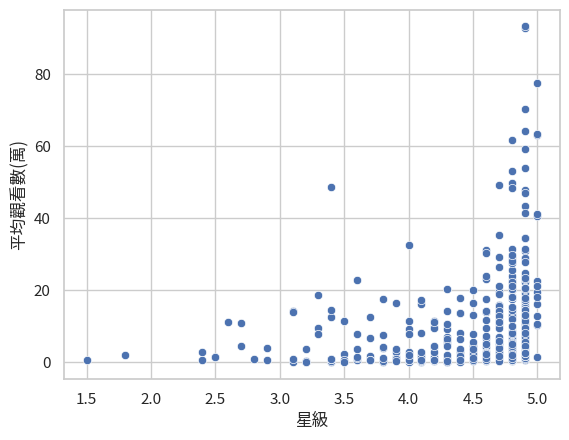

In [20]:
sns.scatterplot(data=df[['星級', '平均觀看數(萬)']], x="星級", y="平均觀看數(萬)")

In [56]:
season_group = df.groupby('月份')
print(season_group['平均觀看數'].aggregate(['min', 'max', 'mean', 'median']))

     min     max           mean   median
月份                                      
冬番  1077  632583   96722.607407  58154.0
夏番   917  492231  107705.681818  78083.5
春番   280  775500  107872.065041  67083.0
秋番  1750  932542  118775.728261  47667.0


In [57]:
df.loc[df.動畫名.str.endswith('年齡限制版')]

,動畫名,總觀看數,平均觀看數,年份,月份,集數,星級,評分人數,導演監督,製作廠商,作品分類1,作品分類2,作品分類3,作品分類4,作品分類5,作品分類6,原作載體,新續作,人氣指標
40,烙印勇士 黃金時代篇 MEMORIAL EDITION 年齡限制版,217000,16692,2022,秋番,13,4.7,1400,佐野雄太,STUDIO４℃,冒險,奇幻,戰爭,血腥暴力,黑暗,18禁,漫畫改編,續作,2
169,終末的後宮 年齡限制版,1014000,92182,2022,冬番,11,4.3,2900,信田ユウ,Studio五組、AXsiZ,科幻,18禁,NaN,NaN,NaN,NaN,漫畫改編,新作,9
249,無意間變成狗，被喜歡的女生撿回家。 年齡限制版,957000,68357,2023,冬番,14,4.6,4200,安藤貴史,Quad,戀愛,18禁,NaN,NaN,NaN,NaN,漫畫改編,新作,7
250,異種族風俗娘評鑑指南 年齡限制版,3078000,256500,2020,冬番,12,4.8,9100,小川優樹,Passione,奇幻,異世界,喜劇,18禁,NaN,NaN,漫畫改編,新作,26
434,彼得・格里爾的賢者時間 Super Extra 年齡限制版,569000,47417,2022,秋番,12,4.3,1800,辰美,WolfsBane×Animation StudiO Seven,奇幻,喜劇,18禁,NaN,NaN,NaN,漫畫改編,續作,5
435,土下座跪求給看 年齡限制版,1034000,79539,2020,秋番,13,4.5,1700,永居慎平,アドネロ,動作,喜劇,勵志,18禁,NaN,NaN,漫畫改編,新作,8
436,女神宿舍的管理員。 年齡限制版,1127000,112700,2021,夏番,10,4.7,2300,中重俊祐,Asread,校園,喜劇,戀愛,18禁,NaN,NaN,漫畫改編,新作,11
437,彼得・格里爾的賢者時間 年齡限制版,1339000,111583,2020,夏番,12,4.2,1600,辰美,Wolfsbane,奇幻,喜劇,18禁,NaN,NaN,NaN,漫畫改編,新作,11


In [60]:
dn = df.導演監督.value_counts()
dn

導演監督
神保昌登     6
赤城博昭     5
川口敬一郎    5
濱名孝行     5
古賀一臣     5
        ..
神戶守      1
飯野慎也     1
本間修      1
鈴木健太郎    1
中重俊祐     1
Name: count, Length: 315, dtype: int64

In [61]:
print(dn[dn >= 3].index)

Index(['神保昌登', '赤城博昭', '川口敬一郎', '濱名孝行', '古賀一臣', '外崎春雄', '石平信司', '信田ユウ', '桑原智',
       '畠山守', '森賢', '羽原久美子', '難波日登志', '市川量也', '西本由紀夫', 'ILCA', '山元隼一', '岸誠二',
       '長崎健司、向井雅浩', '青木純', '川崎逸朗', '平牧大輔', '小川優樹', '橘秀樹', '博史池畠', '小野學',
       '花井宏和'],
      dtype='object', name='導演監督')


In [62]:
studio = df.製作廠商.value_counts()
print(studio)

製作廠商
J.C.STAFF                15
A-1 Pictures             13
LIDENFILMS               13
CloverWorks              12
SUNRISE                  10
                         ..
手塚製作公司、Okuruto Noboru     1
いらゐあす                     1
GEEKTOYS                  1
シンエイ動画                    1
Wolfsbane                 1
Name: count, Length: 200, dtype: int64


In [63]:
print(studio[studio >= 3].index)

Index(['J.C.STAFF', 'A-1 Pictures', 'LIDENFILMS', 'CloverWorks', 'SUNRISE',
       'TMS Entertainment', 'MAPPA', 'MADHOUSE', 'BONES', 'C2C',
       'SILVER LINK.', 'Production I.G', '動画工房', 'project No.9', 'EMT Squared',
       'OLM', '新銳動畫', 'david production', '8bit', 'ufotable', 'ENGI',
       'MAHO FILM', 'Lerche', '亞細亞堂', 'Studio DEEN', 'STUDIO DEEN', 'diomedéa',
       'Passione', 'BN Pictures', 'Kinema Citrus', 'ZERO-G', 'SHAFT',
       'P.A. WORKS', 'Brain's Base', 'Lay-duce', 'ILCA', 'feel.', 'WIT STUDIO',
       '旭Production', 'Studio KAI', '動畫工房', 'Studio 五組', 'C-Station', '三次元',
       'SATELIGHT', 'ENCOURAGE FILMS', 'P.A.WORKS'],
      dtype='object', name='製作廠商')


In [64]:
df.loc[df.製作廠商 == 'J.C.STAFF']

,動畫名,總觀看數,平均觀看數,年份,月份,集數,星級,評分人數,導演監督,製作廠商,作品分類1,作品分類2,作品分類3,作品分類4,作品分類5,作品分類6,原作載體,新續作,人氣指標
13,在地下城尋求邂逅是否搞錯了什麼 第三季,4113000,316385,2020,秋番,13,4.8,5500,橘秀樹,J.C.STAFF,動作,冒險,奇幻,NaN,NaN,NaN,小說改編,續作,32
23,在地下城尋求邂逅是否搞錯了什麼 第四季,5268000,229043,2023,冬番,23,4.8,13100,橘秀樹,J.C.STAFF,動作,冒險,奇幻,NaN,NaN,NaN,小說改編,續作,23
49,銀砂糖師與黑妖精～sugar apple fairy tale～,1044000,43500,2023,冬番,24,4.6,4200,鈴木洋平,J.C.STAFF,冒險,奇幻,戀愛,NaN,NaN,NaN,小說改編,續作,4
88,處刑少女的生存之道,1228000,102333,2022,春番,12,4.7,6200,川崎芳樹,J.C.STAFF,動作,異世界,血腥暴力,NaN,NaN,NaN,小說改編,新作,10
136,失格紋的最強賢者,1734000,144500,2022,冬番,12,3.1,6800,秋田谷典昭,J.C.STAFF,冒險,奇幻,魔法,NaN,NaN,NaN,小說改編,新作,14
158,薔薇王的葬列,158000,6320,2022,冬番,25,3.8,600,鈴木健太郎,J.C.STAFF,戀愛,歷史,戰爭,NaN,NaN,NaN,漫畫改編,新作,1
190,舞伎家的料理人,248000,20667,2021,冬番,12,4.9,1100,鈴木洋平,J.C.STAFF,溫馨,料理,闔家觀賞,NaN,NaN,NaN,漫畫改編,新作,2
211,食戟之靈 豪之皿,1807000,139000,2020,春番,13,4.6,1500,米谷良知,J.C.STAFF,校園,料理,NaN,NaN,NaN,NaN,漫畫改編,續作,14
231,花樣滑冰 Stars,176000,14667,2020,秋番,12,3.6,300,谷口悟朗、福島利規,J.C.STAFF,運動,競技,偶像,NaN,NaN,NaN,原創作品,新作,1
266,獻祭公主與獸王,407000,16958,2023,春番,24,4.9,2100,今千秋,J.C.STAFF,奇幻,戀愛,NaN,NaN,NaN,NaN,漫畫改編,新作,2


In [65]:
df.loc[df.製作廠商 == 'ufotable']

,動畫名,總觀看數,平均觀看數,年份,月份,集數,星級,評分人數,導演監督,製作廠商,作品分類1,作品分類2,作品分類3,作品分類4,作品分類5,作品分類6,原作載體,新續作,人氣指標
2,鬼滅之刃 刀匠村篇,5488000,498909,2023,春番,11,4.8,18600,外崎春雄,ufotable,動作,冒險,奇幻,血腥暴力,NaN,NaN,漫畫改編,續作,50
99,鬼滅之刃 遊郭篇,10212000,928364,2021,秋番,11,4.9,18000,外崎春雄,ufotable,動作,冒險,奇幻,血腥暴力,NaN,NaN,漫畫改編,續作,93
128,國高中一貫！！鬼滅學園物語,307000,43857,2021,冬番,7,4.2,600,外崎春雄,ufotable,校園,青春,闔家觀賞,泡麵番,NaN,NaN,漫畫改編,新作,4
265,鬼滅之刃 無限列車篇,2058000,294000,2021,秋番,7,4.7,6100,外崎春雄,ufotable,動作,冒險,奇幻,血腥暴力,NaN,NaN,漫畫改編,續作,29


In [66]:
df.loc[df.導演監督 == '神保昌登']

,動畫名,總觀看數,平均觀看數,年份,月份,集數,星級,評分人數,導演監督,製作廠商,作品分類1,作品分類2,作品分類3,作品分類4,作品分類5,作品分類6,原作載體,新續作,人氣指標
43,聖劍傳說 Legend of Mana - The Teardrop Crystal -,158000,12154,2022,秋番,13,3.9,700,神保昌登,Graphinica、橫浜動畫研究所,冒險,奇幻,NaN,NaN,NaN,NaN,原創作品,新作,1
86,盾之勇者成名錄 Season 2,2280000,175385,2022,春番,13,3.8,7700,神保昌登,KINEMA CITRUS、DRMOVIE,冒險,奇幻,異世界,魔法,NaN,NaN,小說改編,續作,18
200,白貓 Project Zero Chronicle 零之紀元,528000,44000,2020,春番,12,3.8,800,神保昌登,Project No.9,冒險,奇幻,魔法,NaN,NaN,NaN,遊戲改編,新作,4
233,房間露營,862000,66308,2020,冬番,13,4.9,3400,神保昌登,C-Station,喜劇,溫馨,泡麵番,闔家觀賞,NaN,NaN,漫畫改編,新作,7
385,弩級戰隊 HXEROS,685000,57083,2020,夏番,12,4.5,1200,神保昌登,project No.9,科幻,校園,喜劇,戀愛,NaN,NaN,漫畫改編,新作,6
389,異世界食堂 2,1578000,131500,2021,秋番,12,4.9,5000,神保昌登,OLM,奇幻,異世界,溫馨,料理,NaN,NaN,小說改編,續作,13


In [67]:
df.loc[df.導演監督 == '赤城博昭']

,動畫名,總觀看數,平均觀看數,年份,月份,集數,星級,評分人數,導演監督,製作廠商,作品分類1,作品分類2,作品分類3,作品分類4,作品分類5,作品分類6,原作載體,新續作,人氣指標
70,杜鵑婚約,2512000,54609,2022,春番,46,4.8,6700,赤城博昭,新銳動畫 Synergy SP,校園,戀愛,青春,NaN,NaN,NaN,漫畫改編,新作,5
117,擅長捉弄人的高木同學 第三季,1231000,102583,2022,冬番,12,5.0,10900,赤城博昭,シンエイ動画,校園,喜劇,戀愛,青春,NaN,NaN,漫畫改編,續作,10
260,我內心的糟糕念頭,2304000,192000,2023,春番,12,4.9,18800,赤城博昭,新銳動畫,校園,喜劇,戀愛,NaN,NaN,NaN,漫畫改編,新作,19
290,戰鬥員派遣中！,2447000,203917,2021,春番,12,4.8,5100,赤城博昭,J.C.STAFF,動作,冒險,奇幻,喜劇,NaN,NaN,小說改編,新作,20
292,真白之音,467000,38917,2021,春番,12,4.8,1400,赤城博昭,新銳動畫,校園,競技,音樂,NaN,NaN,NaN,漫畫改編,新作,4


In [68]:
df.loc[df.導演監督 == '古賀一臣']

,動畫名,總觀看數,平均觀看數,年份,月份,集數,星級,評分人數,導演監督,製作廠商,作品分類1,作品分類2,作品分類3,作品分類4,作品分類5,作品分類6,原作載體,新續作,人氣指標
18,久保同學不放過我,1412000,117667,2023,冬番,12,4.9,12700,古賀一臣,PINE JAM,校園,戀愛,青春,NaN,NaN,NaN,漫畫改編,新作,12
69,出租女友 第二季,1432000,119333,2022,夏番,12,4.6,6700,古賀一臣,TMS Entertainment,喜劇,戀愛,青春,NaN,NaN,NaN,漫畫改編,續作,12
112,加油吧同期醬,939000,78250,2021,夏番,12,4.9,3400,古賀一臣,AtelierPontdarc,戀愛,職場,NaN,NaN,NaN,NaN,漫畫改編,新作,8
341,森林裡的熊先生，冬眠中。,164000,18222,2022,夏番,9,3.7,1500,古賀一臣,studio HōKIBOSHI,溫馨,BL,泡麵番,NaN,NaN,NaN,漫畫改編,新作,2
375,出租女友,4255000,354583,2020,夏番,12,4.7,7400,古賀一臣,TMS ENTERTAINMENT,喜劇,戀愛,青春,NaN,NaN,NaN,漫畫改編,續作,35


In [69]:
df.loc[df.導演監督 == '濱名孝行']

,動畫名,總觀看數,平均觀看數,年份,月份,集數,星級,評分人數,導演監督,製作廠商,作品分類1,作品分類2,作品分類3,作品分類4,作品分類5,作品分類6,原作載體,新續作,人氣指標
191,魔術士歐菲 流浪之旅 基姆拉克篇,119000,10818,2021,冬番,11,3.6,200,濱名孝行,STUDIO DEEN,冒險,奇幻,NaN,NaN,NaN,NaN,小說改編,續作,1
244,魔術士歐菲 流浪之旅,521000,37214,2020,冬番,14,3.2,500,濱名孝行,STUDIO DEEN,冒險,奇幻,NaN,NaN,NaN,NaN,小說改編,續作,4
251,魔術士歐菲 流浪之旅 阿邦拉馬篇,67000,5583,2023,冬番,12,3.7,300,濱名孝行,Studio DEEN,冒險,奇幻,NaN,NaN,NaN,NaN,小說改編,續作,1
280,魔術士歐菲 流浪之旅 聖域篇,37000,3083,2023,春番,12,3.2,200,濱名孝行,Studio DEEN,冒險,奇幻,NaN,NaN,NaN,NaN,小說改編,續作,0
310,阿爾蒂,573000,47750,2020,春番,12,4.8,1400,濱名孝行,Seven Arcs,勵志,職場,NaN,NaN,NaN,NaN,漫畫改編,新作,5


In [70]:
df.loc[df.導演監督 == '川口敬一郎']

,動畫名,總觀看數,平均觀看數,年份,月份,集數,星級,評分人數,導演監督,製作廠商,作品分類1,作品分類2,作品分類3,作品分類4,作品分類5,作品分類6,原作載體,新續作,人氣指標
53,新網球王子 U-17 世界盃,260000,20000,2022,夏番,13,4.0,600,川口敬一郎,Studio KAI,超能力,校園,青春,運動,競技,NaN,漫畫改編,續作,2
93,間諜教室,1215000,50625,2023,冬番,24,4.3,6100,川口敬一郎,feel.,動作,校園,推理,NaN,NaN,NaN,小說改編,續作,5
163,暮蟬悲鳴時 業,1914000,79750,2020,秋番,24,4.8,2900,川口敬一郎,Passione,推理,懸疑,血腥暴力,靈異神怪,黑暗,NaN,遊戲改編,續作,8
314,闇影詩章,829000,16255,2020,春番,51,2.5,1300,川口敬一郎,ZEXCS,科幻,校園,闔家觀賞,NaN,NaN,NaN,遊戲改編,續作,2
361,暮蟬悲鳴時 卒,682000,45467,2021,夏番,15,4.5,2000,川口敬一郎,Passione,推理,懸疑,血腥暴力,靈異神怪,黑暗,NaN,遊戲改編,續作,5


In [71]:
df.loc[df.導演監督 == '信田ユウ']

,動畫名,總觀看數,平均觀看數,年份,月份,集數,星級,評分人數,導演監督,製作廠商,作品分類1,作品分類2,作品分類3,作品分類4,作品分類5,作品分類6,原作載體,新續作,人氣指標
169,終末的後宮 年齡限制版,1014000,92182,2022,冬番,11,4.3,2900,信田ユウ,Studio五組、AXsiZ,科幻,18禁,NaN,NaN,NaN,NaN,漫畫改編,新作,9
369,熊熊勇闖異世界,2282000,190167,2020,夏番,12,4.7,4400,信田ユウ,EMT Squared,動作,冒險,奇幻,異世界,NaN,NaN,小說改編,續作,19
407,世界盡頭的聖騎士,1700000,141667,2021,秋番,12,4.3,4300,信田ユウ,Children's Playground Entertainment,冒險,奇幻,魔法,NaN,NaN,NaN,小說改編,續作,14
420,前說！,82000,6308,2020,秋番,13,4.4,200,信田ユウ,Studio 五組、AXsiZ,喜劇,溫馨,職場,NaN,NaN,NaN,原創作品,新作,1


In [72]:
df.loc[df.導演監督 == '外崎春雄']

,動畫名,總觀看數,平均觀看數,年份,月份,集數,星級,評分人數,導演監督,製作廠商,作品分類1,作品分類2,作品分類3,作品分類4,作品分類5,作品分類6,原作載體,新續作,人氣指標
2,鬼滅之刃 刀匠村篇,5488000,498909,2023,春番,11,4.8,18600,外崎春雄,ufotable,動作,冒險,奇幻,血腥暴力,NaN,NaN,漫畫改編,續作,50
99,鬼滅之刃 遊郭篇,10212000,928364,2021,秋番,11,4.9,18000,外崎春雄,ufotable,動作,冒險,奇幻,血腥暴力,NaN,NaN,漫畫改編,續作,93
128,國高中一貫！！鬼滅學園物語,307000,43857,2021,冬番,7,4.2,600,外崎春雄,ufotable,校園,青春,闔家觀賞,泡麵番,NaN,NaN,漫畫改編,新作,4
265,鬼滅之刃 無限列車篇,2058000,294000,2021,秋番,7,4.7,6100,外崎春雄,ufotable,動作,冒險,奇幻,血腥暴力,NaN,NaN,漫畫改編,續作,29


In [73]:
df.loc[df.導演監督 == '小川優樹']

,動畫名,總觀看數,平均觀看數,年份,月份,集數,星級,評分人數,導演監督,製作廠商,作品分類1,作品分類2,作品分類3,作品分類4,作品分類5,作品分類6,原作載體,新續作,人氣指標
250,異種族風俗娘評鑑指南 年齡限制版,3078000,256500,2020,冬番,12,4.8,9100,小川優樹,Passione,奇幻,異世界,喜劇,18禁,NaN,NaN,漫畫改編,新作,26
343,星期一的豐滿 第二季,1000000,83333,2021,夏番,12,4.8,3200,小川優樹,横浜アニメーションラボ,戀愛,溫馨,泡麵番,NaN,NaN,NaN,漫畫改編,續作,8
395,陰陽眼見子,3481000,290083,2021,秋番,12,4.9,12700,小川優樹,Passione,超能力,校園,靈異神怪,NaN,NaN,NaN,漫畫改編,新作,29


In [58]:
d1 = dict(df['作品分類1'].value_counts())
d1

{'動作': 95,
 '冒險': 84,
 '校園': 69,
 '奇幻': 39,
 '喜劇': 33,
 '科幻': 20,
 '青春': 15,
 '戀愛': 13,
 '溫馨': 11,
 '超能力': 11,
 '異世界': 8,
 '推理': 7,
 '勵志': 7,
 '運動': 5,
 '偶像': 4,
 '懸疑': 3,
 '親情': 2,
 '機甲': 2,
 '歷史': 2,
 '魔法': 2,
 '靈異神怪': 2,
 '料理': 1,
 '職場': 1,
 '悠閒': 1,
 '競技': 1}

In [59]:
d2 = dict(df['作品分類2'].value_counts())
d2

{'奇幻': 76,
 '冒險': 45,
 '喜劇': 41,
 '戀愛': 26,
 '青春': 25,
 '科幻': 20,
 '溫馨': 19,
 '校園': 15,
 '魔法': 14,
 '異世界': 14,
 '超能力': 13,
 '競技': 13,
 '懸疑': 13,
 '勵志': 13,
 '悠閒': 10,
 '靈異神怪': 10,
 '機甲': 9,
 '職場': 9,
 '運動': 8,
 '偶像': 8,
 '歷史': 5,
 '音樂': 5,
 '闔家觀賞': 4,
 '泡麵番': 4,
 '推理': 4,
 'BL': 2,
 '18禁': 2,
 '料理': 2,
 '親情': 2,
 '戰爭': 2,
 '血腥暴力': 1}

In [60]:
d3 = dict(df['作品分類3'].value_counts())
d3

{'奇幻': 30,
 '戀愛': 24,
 '異世界': 20,
 '泡麵番': 16,
 '校園': 16,
 '青春': 16,
 '魔法': 16,
 '音樂': 15,
 '喜劇': 15,
 '運動': 12,
 '闔家觀賞': 12,
 '偶像': 10,
 '勵志': 10,
 '靈異神怪': 10,
 '競技': 10,
 '職場': 9,
 '戰爭': 8,
 '科幻': 8,
 '悠閒': 8,
 '血腥暴力': 7,
 '溫馨': 6,
 '懸疑': 6,
 '親情': 5,
 '黑暗': 5,
 '感人': 4,
 '推理': 4,
 '料理': 3,
 '歷史': 3,
 '機甲': 3,
 '超能力': 2,
 '18禁': 2,
 'BL': 1}

In [61]:
d4 = dict(df['作品分類4'].value_counts())
d4

{'音樂': 12,
 '闔家觀賞': 11,
 '異世界': 11,
 '血腥暴力': 10,
 '喜劇': 10,
 '魔法': 8,
 '戀愛': 7,
 '競技': 7,
 '溫馨': 6,
 '靈異神怪': 5,
 '時間穿越': 5,
 '泡麵番': 5,
 '黑暗': 4,
 '勵志': 4,
 '校園': 4,
 '運動': 4,
 '戰爭': 4,
 '青春': 3,
 '18禁': 3,
 '科幻': 3,
 '懸疑': 2,
 '職場': 2,
 '料理': 2,
 '特攝': 2,
 'BL': 1,
 '機甲': 1,
 '推理': 1,
 '親情': 1,
 'GL': 1,
 '超能力': 1,
 '偶像': 1,
 '歷史': 1}

In [62]:
d5 = dict(df['作品分類5'].value_counts())
d5

{'魔法': 8,
 '黑暗': 5,
 '泡麵番': 3,
 '競技': 3,
 '靈異神怪': 3,
 '喜劇': 3,
 '勵志': 3,
 '親情': 2,
 '音樂': 2,
 '血腥暴力': 2,
 '闔家觀賞': 2,
 '推理': 1,
 '戀愛': 1,
 '溫馨': 1,
 '職場': 1,
 'GL': 1,
 '校園': 1,
 '感人': 1,
 '科幻': 1}

In [63]:
d6 = dict(df['作品分類6'].value_counts())
d6

{'靈異神怪': 2, '18禁': 1, '血腥暴力': 1, '闔家觀賞': 1}

In [64]:
print('靈異神怪:', d1['靈異神怪'] + d2['靈異神怪'] + d3['靈異神怪'] + d4['靈異神怪'] + d5['靈異神怪'] + d6['靈異神怪'])
print('血腥暴力:', d2['血腥暴力'] + d3['血腥暴力'] + d4['血腥暴力'] + d5['血腥暴力'] + d6['血腥暴力'])  # d1無血腥暴力
print('闔家觀賞:', d2['闔家觀賞'] + d3['闔家觀賞'] + d4['闔家觀賞'] + d5['闔家觀賞'] + d6['闔家觀賞'])  # d1無闔家觀賞
print('18禁:', d2['18禁'] + d3['18禁'] + d4['18禁'] + d6['18禁'])
print('科幻:', d1['科幻'] + d2['科幻'] + d3['科幻'] + d4['科幻'] + d5['科幻'])
print('感人:', d3['感人'] + d5['感人'])  # d1、d2、d4無感人
print('校園:', d1['校園'] + d2['校園'] + d3['校園'] + d4['校園'] + d5['校園'])
print('GL:', d4['GL'] + d5['GL'])
print('職場:', d1['職場'] + d2['職場'] + d3['職場'] + d4['職場'] + d5['職場'])
print('溫馨:', d1['溫馨'] + d2['溫馨'] + d3['溫馨'] + d4['溫馨'] + d5['溫馨'])
print('戀愛:', d1['戀愛'] + d2['戀愛'] + d3['戀愛'] + d4['戀愛'] + d5['戀愛'])
print('推理:', d1['推理'] + d2['推理'] + d3['推理'] + d4['推理'] + d5['推理'])
print('音樂:', d2['音樂'] + d3['音樂'] + d4['音樂'] + d5['音樂'])
print('親情:', d1['親情'] + d2['親情'] + d3['親情'] + d4['親情'] + d5['親情'])
print('勵志:', d1['勵志'] + d2['勵志'] + d3['勵志'] + d4['勵志'] + d5['勵志'])
print('喜劇:', d1['喜劇'] + d2['喜劇'] + d3['喜劇'] + d4['喜劇'] + d5['喜劇'])
print('競技:', d1['競技'] + d2['競技'] + d3['競技'] + d4['競技'] + d5['競技'])
print('泡麵番:', d2['泡麵番'] + d3['泡麵番'] + d4['泡麵番'] + d5['泡麵番'])
print('黑暗:', d3['黑暗'] + d4['黑暗'] + d5['黑暗'])
print('魔法:', d1['魔法'] + d2['魔法'] + d3['魔法'] + d4['魔法'] + d5['魔法'])
print('歷史:', d1['歷史'] + d2['歷史'] + d3['歷史'] + d4['歷史'])
print('BL:', d2['BL'] + d3['BL'] + d4['BL'])
print('機甲:', d1['機甲'] + d2['機甲'] + d3['機甲'] + d4['機甲'])
print('超能力:', d1['超能力'] + d2['超能力'] + d3['超能力'] + d4['超能力'])
print('偶像:', d1['偶像'] + d2['偶像'] + d3['偶像'] + d4['偶像'])
print('特攝:', d4['特攝'])
print('料理:', d1['料理'] + d2['料理'] + d3['料理'] + d4['料理'])
print('懸疑:', d1['懸疑'] + d2['懸疑'] + d3['懸疑'] + d4['懸疑'])
print('青春:', d1['青春'] + d2['青春'] + d3['青春'] + d4['青春'])
print('戰爭:', d2['戰爭'] + d3['戰爭'] + d4['戰爭'])
print('運動:', d1['運動'] + d2['運動'] + d3['運動'] + d4['運動'])
print('時間穿越:', d4['時間穿越'])
print('異世界:', d1['異世界'] + d2['異世界'] + d3['異世界'] + d4['異世界'])
print('悠閒:', d1['悠閒'] + d2['悠閒'] + d3['悠閒'])
print('奇幻:', d1['奇幻'] + d2['奇幻'] + d3['奇幻'])
print('冒險:', d1['冒險'] + d2['冒險'])
print('動作:', d1['動作'])

靈異神怪: 32
血腥暴力: 21
闔家觀賞: 30
18禁: 8
科幻: 52
感人: 5
校園: 105
GL: 2
職場: 22
溫馨: 43
戀愛: 71
推理: 17
音樂: 34
親情: 12
勵志: 37
喜劇: 102
競技: 34
泡麵番: 28
黑暗: 14
魔法: 48
歷史: 11
BL: 4
機甲: 15
超能力: 27
偶像: 23
特攝: 2
料理: 8
懸疑: 24
青春: 59
戰爭: 14
運動: 29
時間穿越: 5
異世界: 53
悠閒: 19
奇幻: 145
冒險: 129
動作: 95


In [11]:
df['平均觀看數(萬)'].describe()

count    438.000000
mean      10.668493
std       13.564352
min        0.000000
25%        1.900000
50%        5.850000
75%       13.975000
max       93.300000
Name: 平均觀看數(萬), dtype: float64

<Axes: ylabel='平均觀看數(萬)'>

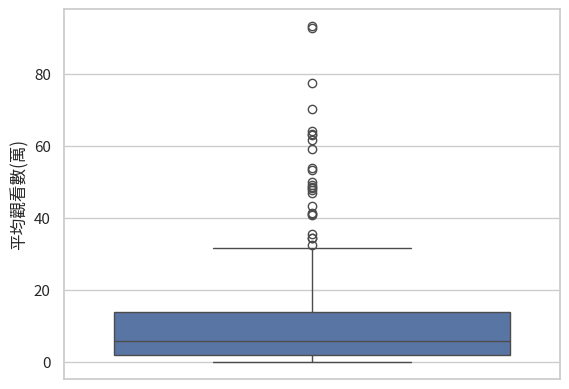

In [10]:
sns.boxplot(data=df['平均觀看數(萬)'])

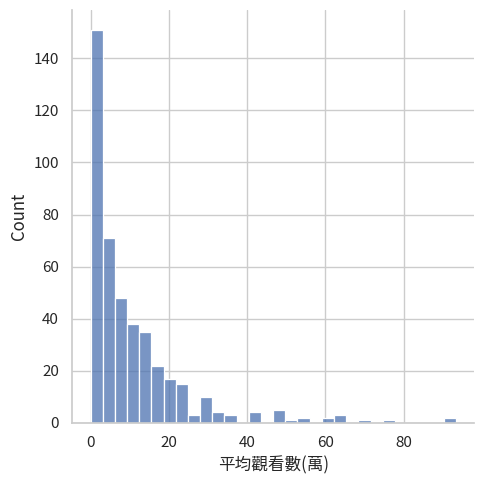

In [5]:
sns.displot(data=df, x='平均觀看數(萬)')

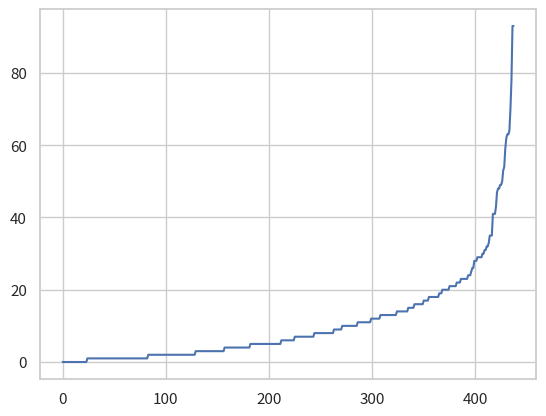

In [125]:
data = df.sort_values('人氣指標')
listx = [x for x in range(438)]
listy = data['人氣指標']
plt.plot(listx, listy)
plt.show()

In [129]:
df1 = df.loc[df['人氣指標'] > 40].sort_values('人氣指標', ascending=False)
df1

,動畫名,總觀看數,平均觀看數,年份,月份,集數,星級,評分人數,導演監督,製作廠商,作品分類1,作品分類2,作品分類3,作品分類4,作品分類5,作品分類6,原作載體,新續作,人氣指標
428,咒術迴戰,22381000,932542,2020,秋番,24,4.9,20200,朴性厚,MAPPA,動作,奇幻,超能力,校園,血腥暴力,靈異神怪,漫畫改編,新作,93
99,鬼滅之刃 遊郭篇,10212000,928364,2021,秋番,11,4.9,18000,外崎春雄,ufotable,動作,冒險,奇幻,血腥暴力,NaN,NaN,漫畫改編,續作,93
304,輝夜姬想讓人告白～天才們的戀愛頭腦戰～ 第二季,9306000,775500,2020,春番,12,5.0,20200,畠山守,A-1 Pictures,校園,喜劇,戀愛,NaN,NaN,NaN,漫畫改編,續作,78
68,SPY×FAMILY 間諜家家酒,17603000,704120,2022,春番,25,4.9,52700,古橋一浩,WIT STUDIO×CloverWorks,動作,喜劇,親情,NaN,NaN,NaN,漫畫改編,續作,70
16,【我推的孩子】,7065000,642273,2023,春番,11,4.9,52600,平牧大輔,動畫工房 (DOGAKOBO),親情,偶像,懸疑,NaN,NaN,NaN,漫畫改編,新作,64
47,孤獨搖滾！,7579000,631583,2022,秋番,12,5.0,44800,齋藤圭一郎,CloverWorks,校園,喜劇,青春,勵志,音樂,NaN,漫畫改編,新作,63
125,戀上換裝娃娃,7591000,632583,2022,冬番,12,5.0,41200,篠原啓輔,CloverWorks,校園,戀愛,青春,NaN,NaN,NaN,漫畫改編,新作,63
238,關於我轉生變成史萊姆這檔事 第二季,16078000,618385,2021,冬番,26,4.8,14100,中山敦史,8bit,冒險,奇幻,異世界,魔法,喜劇,NaN,小說改編,續作,62
252,進擊的巨人 The Final Season,17210000,593448,2020,秋番,29,4.9,24800,林祐一郎,MAPPA,動作,冒險,戰爭,血腥暴力,NaN,NaN,原創作品,新作,59
141,無職轉生，到了異世界就拿出真本事,12968000,540333,2021,冬番,24,4.9,25800,岡本学,StudioBind,動作,冒險,奇幻,異世界,魔法,NaN,小說改編,新作,54


In [92]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, 428 to 297
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   動畫名     21 non-null     object 
 1   總觀看數    21 non-null     int64  
 2   平均觀看數   21 non-null     int64  
 3   年份      21 non-null     int64  
 4   月份      21 non-null     object 
 5   集數      21 non-null     int64  
 6   星級      21 non-null     float64
 7   評分人數    21 non-null     int64  
 8   導演監督    21 non-null     object 
 9   製作廠商    21 non-null     object 
 10  作品分類1   21 non-null     object 
 11  作品分類2   21 non-null     object 
 12  作品分類3   20 non-null     object 
 13  作品分類4   12 non-null     object 
 14  作品分類5   7 non-null      object 
 15  作品分類6   2 non-null      object 
 16  原作載體    21 non-null     object 
 17  新續作     21 non-null     object 
 18  人氣指標    21 non-null     int64  
dtypes: float64(1), int64(6), object(12)
memory usage: 3.3+ KB


In [93]:
df1['人氣指標'].describe()

count    21.000000
mean     57.571429
std      15.448532
min      41.000000
25%      48.000000
50%      53.000000
75%      63.000000
max      93.000000
Name: 人氣指標, dtype: float64

<Axes: ylabel='人氣指標'>

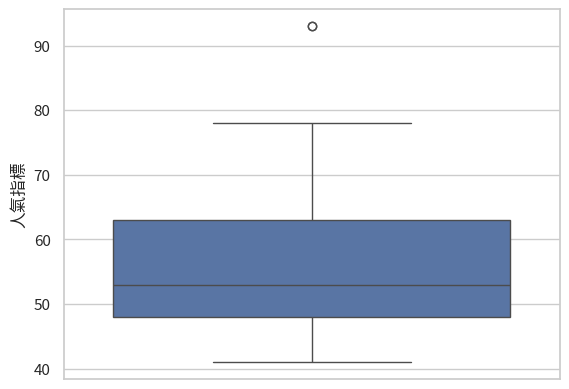

In [94]:
sns.boxplot(data=df1['人氣指標'])

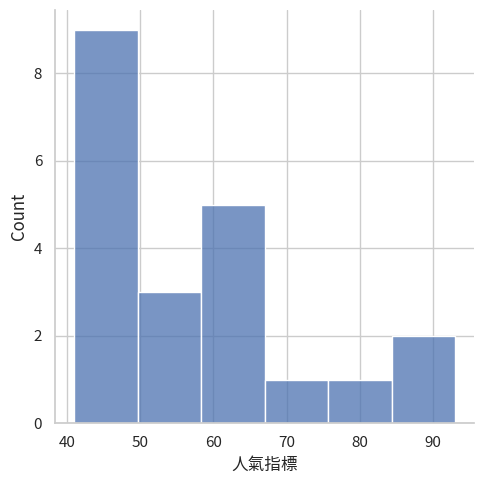

In [95]:
sns.displot(data=df1, x='人氣指標')

<Axes: xlabel='動畫名', ylabel='人氣指標'>

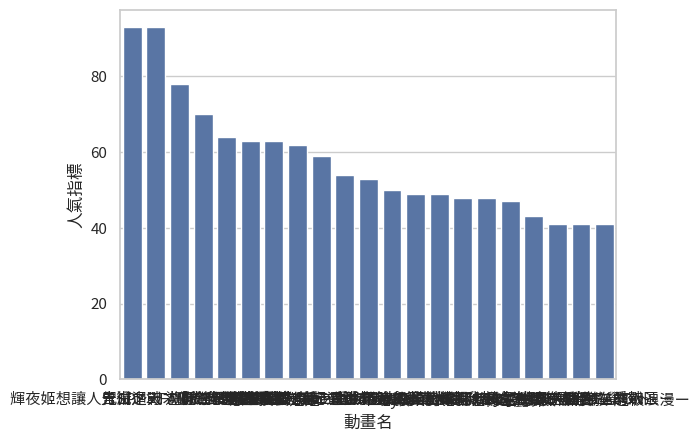

In [128]:
sns.barplot(data=df1, x='動畫名', y='人氣指標')

In [77]:
df2 = df.loc[(df['觀看數(萬)'] <= 40) & (df['觀看數(萬)'] > 20)
             ].sort_values('觀看數(萬)', ascending=False)
df2

,動畫名,總觀看數,平均觀看數,年份,月份,集數,星級,評分人數,導演監督,製作廠商,作品分類1,作品分類2,作品分類3,作品分類4,作品分類5,作品分類6,原作載體,新續作,人氣度,觀看數(萬)
289,Vivy -Fluorite Eye's Song-,4844000,346000,2021,春番,14,4.9,20100,江崎慎平,WIT STUDIO,動作,科幻,音樂,NaN,NaN,NaN,原創作品,新作,3,35
373,出租女友,4255000,354583,2020,夏番,12,4.7,7400,古賀一臣,TMS ENTERTAINMENT,喜劇,戀愛,青春,NaN,NaN,NaN,漫畫改編,續作,3,35
72,OVERLORD 第四季,4503000,346385,2022,夏番,13,4.9,14700,伊藤尚往,MADHOUSE,冒險,奇幻,異世界,魔法,NaN,NaN,小說改編,續作,3,35
170,轉生成蜘蛛又怎樣！,7802000,325083,2021,冬番,24,4.0,7000,板垣伸,Millepensee,動作,冒險,奇幻,時間穿越,NaN,NaN,小說改編,新作,3,33
13,在地下城尋求邂逅是否搞錯了什麼 第三季,4113000,316385,2020,秋番,13,4.8,5500,橘秀樹,J.C.STAFF,動作,冒險,奇幻,NaN,NaN,NaN,小說改編,續作,3,32
408,排球少年！！第四季 Part 2,3785000,315417,2020,秋番,12,4.9,5500,佐藤雅子,Production I.G,校園,勵志,運動,NaN,NaN,NaN,漫畫改編,續作,3,32
197,排球少年！！第四季,4012000,308615,2020,冬番,13,4.9,5100,佐藤雅子,Production I.G,校園,勵志,運動,NaN,NaN,NaN,漫畫改編,續作,3,31
58,歡迎來到實力至上主義的教室 第二季,4060000,312308,2022,夏番,13,4.6,12700,岸誠二、橋本裕之、仁昌寺義人,Lerche,校園,懸疑,黑暗,NaN,NaN,NaN,小說改編,續作,3,31
411,魔法科高中的劣等生 來訪者篇,3881000,298538,2020,秋番,13,4.8,4400,吉田りさこ,8bit,奇幻,魔法,科幻,校園,NaN,NaN,小說改編,續作,3,30
285,刮掉鬍子的我與撿到的女高中生,3964000,304923,2021,春番,13,4.6,8900,上北學,project No.9,戀愛,溫馨,NaN,NaN,NaN,NaN,小說改編,新作,3,30


In [72]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42 entries, 289 to 416
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   動畫名     42 non-null     object 
 1   總觀看數    42 non-null     int64  
 2   平均觀看數   42 non-null     int64  
 3   年份      42 non-null     int64  
 4   月份      42 non-null     object 
 5   集數      42 non-null     int64  
 6   星級      42 non-null     float64
 7   評分人數    42 non-null     int64  
 8   導演監督    42 non-null     object 
 9   製作廠商    42 non-null     object 
 10  作品分類1   42 non-null     object 
 11  作品分類2   42 non-null     object 
 12  作品分類3   35 non-null     object 
 13  作品分類4   19 non-null     object 
 14  作品分類5   5 non-null      object 
 15  作品分類6   0 non-null      object 
 16  原作載體    42 non-null     object 
 17  新續作     42 non-null     object 
 18  人氣度     42 non-null     int64  
 19  觀看數(萬)  42 non-null     int64  
dtypes: float64(1), int64(7), object(12)
memory usage: 6.9+ KB


In [98]:
df2['人氣指標'].describe()

count    417.000000
mean       8.338129
std        8.039764
min        0.000000
25%        2.000000
50%        5.000000
75%       13.000000
max       35.000000
Name: 人氣指標, dtype: float64

<Axes: ylabel='人氣指標'>

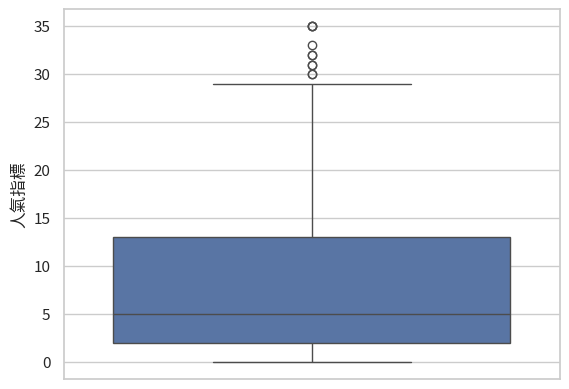

In [99]:
sns.boxplot(data=df2['人氣指標'])

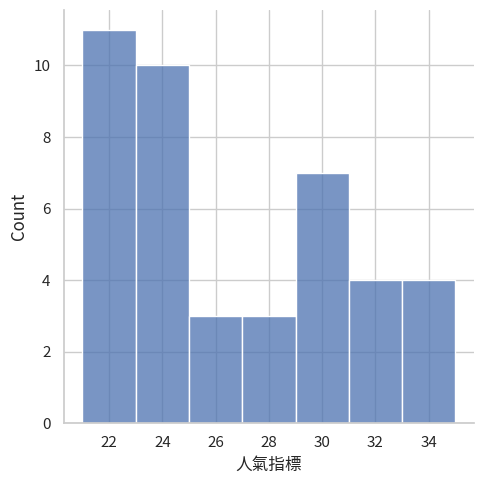

In [102]:
sns.displot(data=df2, x='人氣指標')

In [74]:
df3 = df.loc[(df['觀看數(萬)'] <= 20) & (df['觀看數(萬)'] > 10)
             ].sort_values('觀看數(萬)', ascending=False)

In [75]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89 entries, 175 to 435
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   動畫名     89 non-null     object 
 1   總觀看數    89 non-null     int64  
 2   平均觀看數   89 non-null     int64  
 3   年份      89 non-null     int64  
 4   月份      89 non-null     object 
 5   集數      89 non-null     int64  
 6   星級      89 non-null     float64
 7   評分人數    89 non-null     int64  
 8   導演監督    89 non-null     object 
 9   製作廠商    89 non-null     object 
 10  作品分類1   89 non-null     object 
 11  作品分類2   89 non-null     object 
 12  作品分類3   75 non-null     object 
 13  作品分類4   37 non-null     object 
 14  作品分類5   14 non-null     object 
 15  作品分類6   1 non-null      object 
 16  原作載體    89 non-null     object 
 17  新續作     89 non-null     object 
 18  人氣度     89 non-null     int64  
 19  觀看數(萬)  89 non-null     int64  
dtypes: float64(1), int64(7), object(12)
memory usage: 14.6+ KB


In [105]:
df3['人氣指標'].describe()

count    375.000000
mean       6.344000
std        5.488594
min        0.000000
25%        2.000000
50%        5.000000
75%       10.000000
max       20.000000
Name: 人氣指標, dtype: float64

<Axes: ylabel='人氣指標'>

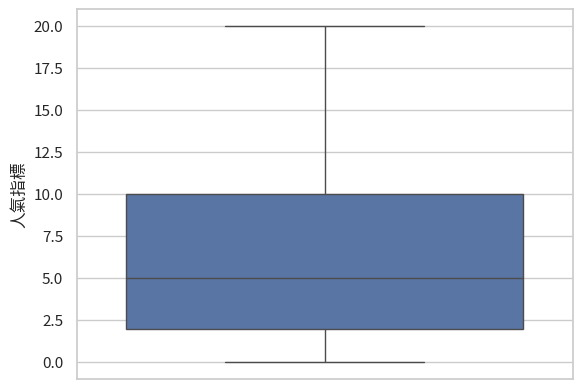

In [106]:
sns.boxplot(data=df3['人氣指標'])

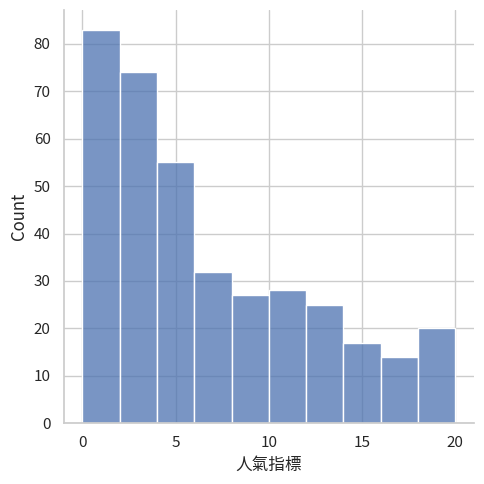

In [107]:
sns.displot(data=df3, x='人氣指標')

In [5]:
df4 = df.loc[df['觀看數(萬)'] <= 10].sort_values('觀看數(萬)', ascending=False)

df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 286 entries, 64 to 77
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   動畫名     286 non-null    object 
 1   總觀看數    286 non-null    int64  
 2   平均觀看數   286 non-null    int64  
 3   年份      286 non-null    int64  
 4   月份      286 non-null    object 
 5   集數      286 non-null    int64  
 6   星級      286 non-null    float64
 7   評分人數    286 non-null    int64  
 8   導演監督    284 non-null    object 
 9   製作廠商    286 non-null    object 
 10  作品分類1   286 non-null    object 
 11  作品分類2   282 non-null    object 
 12  作品分類3   186 non-null    object 
 13  作品分類4   74 non-null     object 
 14  作品分類5   18 non-null     object 
 15  作品分類6   2 non-null      object 
 16  原作載體    286 non-null    object 
 17  新續作     286 non-null    object 
 18  人氣度     286 non-null    int64  
 19  觀看數(萬)  286 non-null    int64  
dtypes: float64(1), int64(7), object(12)
memory usage: 46.9+ KB


In [117]:
df4['人氣指標'].describe()

count    203.000000
mean       4.980296
std        2.550404
min        2.000000
25%        3.000000
50%        5.000000
75%        7.000000
max       10.000000
Name: 人氣指標, dtype: float64

<Axes: ylabel='人氣指標'>

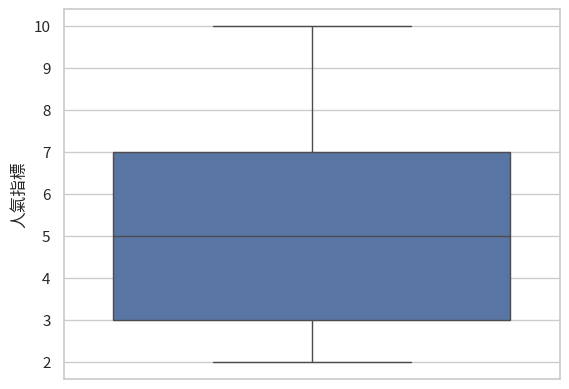

In [118]:
sns.boxplot(data=df4['人氣指標'])

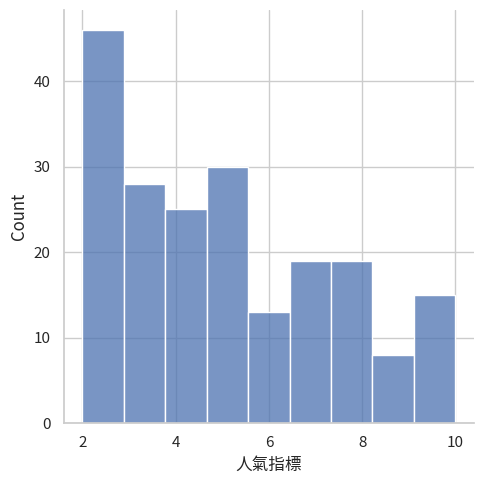

In [119]:
sns.displot(data=df4, x='人氣指標')